In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from pathlib import Path
folder='./Helper_scripts/'

importLibs=1
for path in Path(folder).rglob('*.py'):
    print(path.name)
    exec(open(path).read())

parseCC.py
GetFrequencyFromZCfile.py
VariablesExperiment.py
importLibs0.py
FFT.py
DisplayAndCut.py


In [3]:
VariablesExperiment(20210727)

In [4]:
import numpy as np
import pandas as pd
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
#%matplotlib notebook
import os
poles=12
fname1="AZC_3Phasen_"

In [5]:
n=3
fname1+=str(n)+'_'+scope_dat.iloc[n]['Symbol']+'_'

In [6]:
fname1

'AZC_3Phasen_3_Rotor_Deviated_'

In [7]:
file=scope_dat.iloc[n]['SerialFile']
df=pd.read_csv(file,sep=";",skiprows=0)
df['time']=df['ESP_CC']*1/uC_clock_speed   #aus CC Zeit berechnen
df['delta_t']=df['time'].diff()

In [8]:
df1=OverflowCC_local(df)

In [9]:
df1.head()

,unixtime,input,ESP_CC,cc_overflow_count,Unnamed: 4,time,delta_t,cc_overflow_python,cc_total,cc_diff,count
0,1.627397e+09,3,885123934,1,NaN,5.532025,NaN,1,5180091230,NaN,1
1,1.627397e+09,1,885996735,1,NaN,5.537480,0.005455,1,5180964031,NaN,1
2,1.627397e+09,2,886850492,1,NaN,5.542816,0.005336,1,5181817788,NaN,1
3,1.627397e+09,3,887712576,1,NaN,5.548204,0.005388,1,5182679872,2588642.0,2
4,1.627397e+09,1,888583619,1,NaN,5.553648,0.005444,1,5183550915,2586884.0,2


,unixtime,input,ESP_CC,cc_overflow_count,Unnamed: 4,time,delta_t,cc_overflow_python,cc_total,cc_diff,count,time0s
0,1.627397e+09,3,885123934,1,NaN,5.532025,NaN,1,5180091230,NaN,1,0.000000
1,1.627397e+09,1,885996735,1,NaN,5.537480,0.005455,1,5180964031,NaN,1,0.005455
2,1.627397e+09,2,886850492,1,NaN,5.542816,0.005336,1,5181817788,NaN,1,0.010791
3,1.627397e+09,3,887712576,1,NaN,5.548204,0.005388,1,5182679872,2588642.0,2,0.016179
4,1.627397e+09,1,888583619,1,NaN,5.553648,0.005444,1,5183550915,2586884.0,2,0.021623


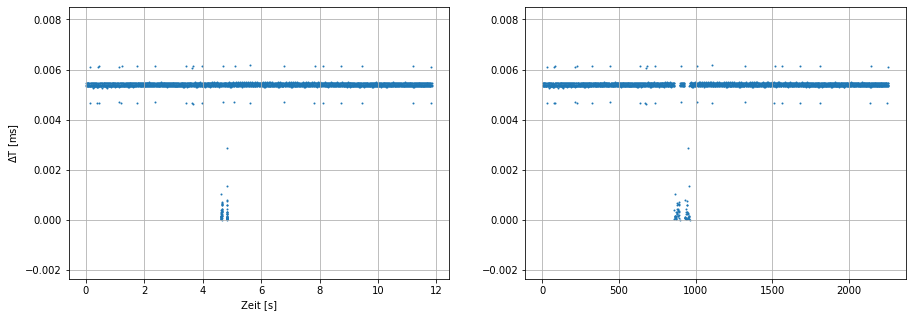

In [10]:
df=df1
df['time0s']=(df['time']-df.head(1)['time'].values)
display(df.head(5))
fig, ax0 = plt.subplots(1,2,figsize = (15,5))
ax=ax0[0]
ax.scatter(df['time0s'],df['delta_t'],s=1)
#t = np.arange(0.0, 20.0+1.0, 1.0)
#ax.xaxis.set_ticks(t)
#plt.xlim(4,17)
ax.grid(True)
#plt.title(r'$B_Z$ [ $\mu T$ ] in Rotornähe während einer Umdrehung')
ax.set_xlabel('Zeit [s]')
ax.set_ylabel(r'$\Delta$T [ms]')
ax=ax0[1]
ax.grid(True)
ax.scatter(df.index,df['delta_t'],s=1)
plt.show()


## Bereich ohne Fehler auswählen

In [11]:
a=479;b=600
# Wie Viele Umdrehungen?
c0=df.loc[a,'count']
#df.loc[df['time']<1.25e8]
c1=df.loc[b,'count']
display(c1-c0)
display((c1-c0)/poles)
print('time c1: '+str(df.loc[b,'time0s']))

41

3.4166666666666665

time c1: 3.2337561


In [12]:
df=df.loc[a:b].copy()
df.reset_index(inplace = True,drop = True) 

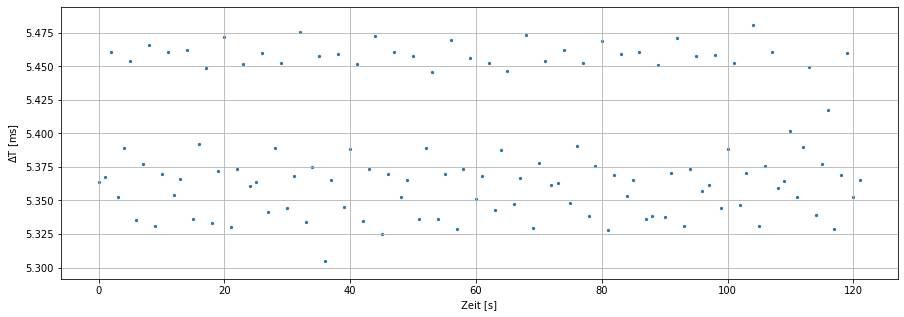

In [13]:
#display(df.head(5))
fig, ax0 = plt.subplots(1,figsize = (15,5))
ax=ax0
ax.scatter(df.index,df['delta_t']*1e3,s=5)
#ax.set_ylim(5e-3,5.6e-3)
ax.grid(True)
ax.set_xlabel('Zeit [s]')
ax.set_ylabel(r'$\Delta$T [ms]')
filename=fname1+'MessergebnisseAuswertung.png'
#plt.savefig(filename, bbox_inches='tight',dpi=900)
plt.show()

## Regression

In [14]:
x =df['time']   #erklärend , unabhängig
y =df['delta_t']  # erklärte, abhängig
p = np.polyfit(x, y, 6)  # Last argument is degree of polynomial

print("Coeeficient values:\n", p)
print("y=ax**3+bx**2+cx+d")
predict = np.poly1d(p)
#x_test = 15
#print("\nGiven x_test value is: ", x_test)
#y_pred = predict(x_test)
#print("\nPredicted value of y_pred for given x_test is: ", y_pred)
df['delta_t_pred']=predict(df['time'])

Coeeficient values:
 [-6.19250923e-02  3.13590795e+00 -6.61604075e+01  7.44356652e+02
 -4.71016004e+03  1.58941752e+04 -2.23448713e+04]
y=ax**3+bx**2+cx+d


In [15]:
from sklearn.metrics import r2_score
print(r2_score(y, predict(x))) 

0.003432320261205435


In [16]:
df['delta_t'].mean()

0.005390066752049173

In [17]:
df['error']=df['delta_t_pred']-df['delta_t']
print("Mean Error " + str(df['error'].mean()))
print("RMSE "+ str((df['error']** 2).mean() ** 0.5))

Mean Error -7.685051138267107e-11
RMSE 5.007180826757692e-05


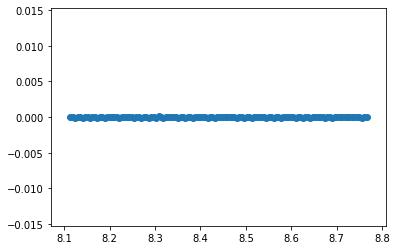

In [18]:
plt.scatter(df['time'],df['error'])

In [19]:
df['pole']=df.index % (3*poles)
df['N']=df.index // (3*poles)

In [20]:
a=0*poles;b=3*3*poles
df4=df[a:b].copy()

In [21]:
df4[['input','time','error','pole','N']]

,input,time,error,pole,N
0,2,8.113556,0.000021,0,0
1,3,8.118924,0.000019,1,0
2,1,8.124385,-0.000073,2,0
3,2,8.129738,0.000037,3,0
4,3,8.135127,0.000002,4,0
...,...,...,...,...,...
103,3,8.668807,0.000020,31,2
104,1,8.674288,-0.000090,32,2
105,2,8.679619,0.000060,33,2
106,3,8.684994,0.000015,34,2


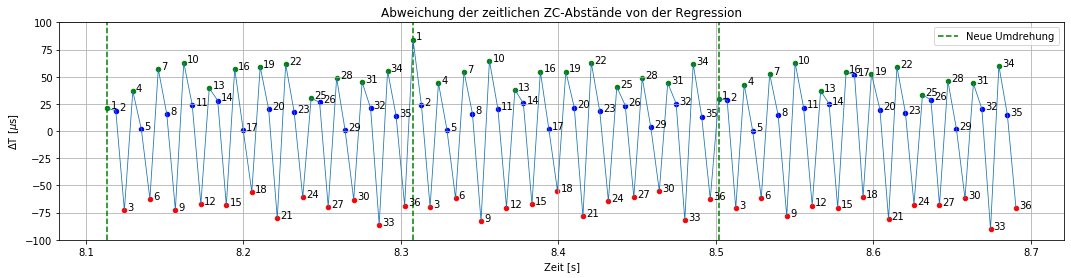

In [22]:
xs=df4['time']
ys=df4['error']*1e6 #für usek
ZC_inp=df4['input']
marker=df4['pole']+1
plt.figure(figsize=(18,4))
plt.plot(xs,ys,lw=0.8)
#plt.scatter(xs,ys,s=15,label='Messpunkt, Nr. ZC')
i=True
vlineHigh=(ys.max()//10+2)*10
s1=20
for x, y,m,ZC_in in zip(xs, ys,marker,ZC_inp):
    plt.text(x+2e-3, y, str(m), color="black", fontsize=10)
    if(ZC_in==1):
        plt.scatter(x,y,s=s1,c='r',label='_Messpunkt ZC Phase L1L2, Nr. ZC')
    if(ZC_in==2):
        plt.scatter(x,y,s=s1,c='g',label='_Messpunkt ZC Phase L1L2, Nr. ZC')
    if(ZC_in==3):
        plt.scatter(x,y,s=s1,c='b',label='_Messpunkt ZC Phase L1L2, Nr. ZC')
    if(m==1):
        plt.vlines(x,-vlineHigh,vlineHigh ,colors='g',linestyle='--',label='Neue Umdrehung' if i == True else "")
        i=False
plt.ylim(-vlineHigh,vlineHigh)
plt.title(r'Abweichung der zeitlichen ZC-Abstände von der Regression')
plt.xlabel('Zeit [s]')
plt.ylabel(r'$\Delta$T [$\mu$s]')
plt.legend()
plt.grid(True)
filename=fname1+'reg'
#plt.savefig(filename+'.png', bbox_inches='tight',dpi=900)
#plt.savefig(filename+'.eps', bbox_inches='tight')
plt.show()

In [23]:

df4_sp=df4.sort_values(by=['pole'])

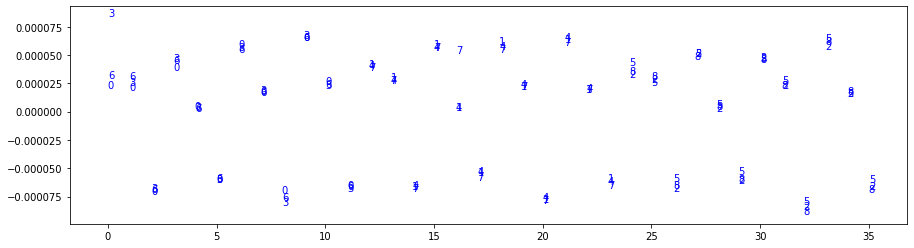

In [24]:
xs=df4_sp['pole']
ys=df4_sp['error']
marker=df4_sp.index//poles
plt.figure(figsize=(15,4))
for x, y,m in zip(xs, ys,marker):
    #print(x,y,m)
    plt.text(x, y, str(m), color="blue", fontsize=10)
    plt.scatter(x, y,s=0.0001)
plt.show()

# Heatmap

In [25]:
df_copy=df[['pole','N','delta_t','error']].copy()
df_copy.drop(df.tail(df_copy.shape[0]%poles).index,inplace=True)
times=df_copy['error'].to_numpy()*1e6
times=np.array_split(times, df_copy.shape[0]/(poles))

<Figure size 432x288 with 0 Axes>

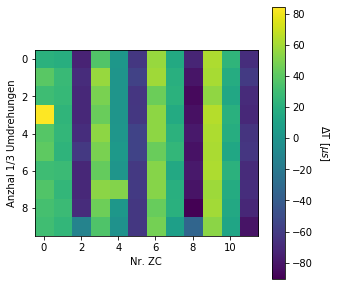

In [26]:
plt.figure()
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(times)
cbar=fig.colorbar(im)
ax.set_xlabel("Nr. ZC")
ax.set_ylabel("Anzhal 1/3 Umdrehungen")
cbar.ax.set_ylabel(r'$\Delta$T [$\mu s$]', rotation=-90, va="bottom")
#plt.title(r'Abweichung der zeitlichen ZC-Abstände von der Regression')
filename=fname1+'reg_heat.png'
#plt.savefig(filename+'.png', bbox_inches='tight',dpi=900)
#plt.savefig(filename+'.eps', bbox_inches='tight')
plt.show()

(array([ 9., 27.,  2.,  1.,  1., 14., 31., 16., 20.,  1.]),
 array([-9.03086187e-05, -7.28559346e-05, -5.54032506e-05, -3.79505666e-05,
        -2.04978826e-05, -3.04519858e-06,  1.44074854e-05,  3.18601695e-05,
         4.93128535e-05,  6.67655375e-05,  8.42182215e-05]),
 <a list of 10 Patch objects>)

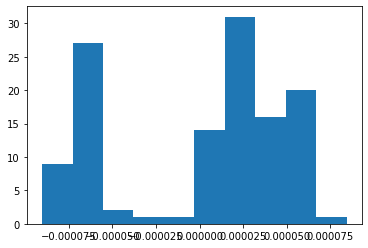

In [27]:
plt.hist(df['error'])

In [28]:
df.loc[df['error']>2e-4]=0
df.loc[df['error']<-2e-4]=0

In [29]:
ys.max()

8.421822150062042e-05